# Plotting Beam-Limiting Devices

This notebook provides examples of how to plot with BeamLimitingDevicePlots.jl, along various settings.

Generally, the package exports the `plot_bld` and `plot_bld!` functions:

- `plot_bld(args...; kwargs...)` takes beam-limiting device types as defined in DoseCalculations.jl and plots them on a new figure.
- `plot_bld!([p,] args...; kwargs...)` adds beam-limiting device plots to existing figures

In [1]:
using DoseCalculations
using BeamLimitingDevicePlots

## Multi-Leaf Collimator

To demonstrate plotting the aperture created by an MLC, a small function is defined to create different MLC apertures

In [2]:
function sphere_mlc_aperture(x₀, y₀, R)
    y = vcat(-60.:10.:-40., -30.:5.:30., 40.:10.:60.) .+ y₀;
    yc = 0.5*(y[1:end-1]+y[2:end])

    xL = @. x₀-sqrt(max(0., R^2-(yc-y₀)^2))
    xU = @. x₀+sqrt(max(0., R^2-(yc-y₀)^2))
    x = hcat(xL, xU)
    MultiLeafCollimator(x', y)
end


sphere_mlc_aperture (generic function with 1 method)

The default MLC plotting fills in the region obscured by the MLC:

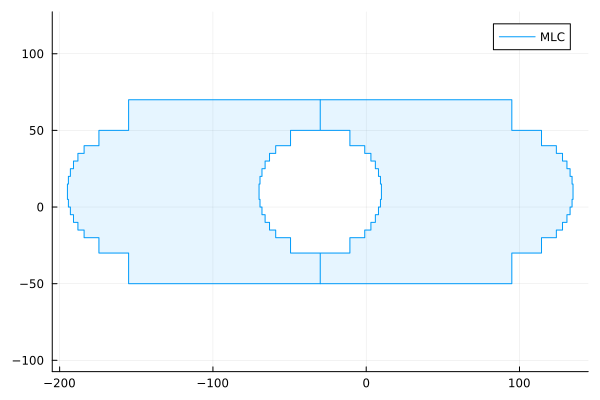

In [3]:
mlc = sphere_mlc_aperture(-30., 10., 40.)
plot_bld(mlc; label="MLC")

It also handles leaves of variable width, as can be seen by the larger leaf widths above at the top and bottom of the aperture.

`plot_bld!(mlc::MultiLeafCollimator; kwargs...)` also takes the following arguments:

- `invert`: Fills the region **not** obscured by the leaves, defaults to `false`
- `fill`: Whether to fill, defaults to `true`
- `fillalpha`: Transparency of the fill, defaults to 0.1
- `leaf_length`: The length of the leaves, defaults to 125 mm

The other keyword arguments in `kwargs...` are passed to Plots.jl's `plot` function.

Here, `plot_bld!` is used to add to an existing figure:

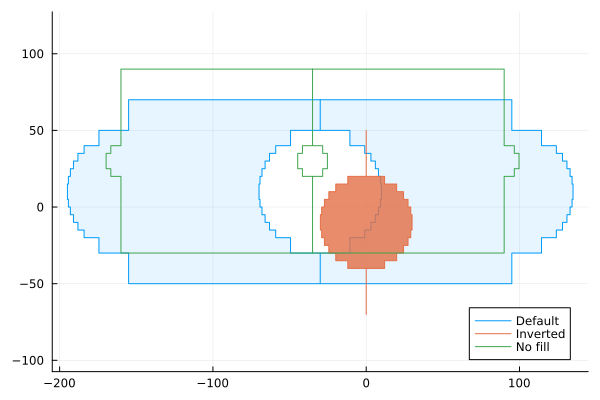

In [4]:
mlc2 = sphere_mlc_aperture(0., -10., 30.)
mlc3 = sphere_mlc_aperture(-35., 30., 10.)
plot_bld(mlc; label="Default")
plot_bld!(mlc2; invert=true, fillalpha=0.8, label="Inverted")
plot_bld!(mlc3; fill=false, label="No fill")

## Jaws

`Jaws` can be plotted similarly using `plot_bld(jaws)`:

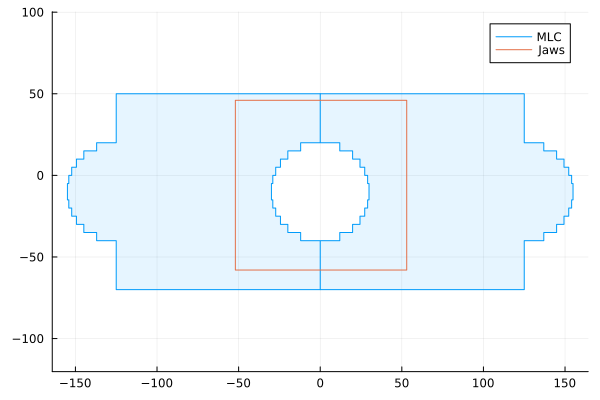

In [12]:
jaws = Jaws([-52., 53], [-58., 46.])

plot_bld(mlc2; label="MLC")
plot_bld!(jaws; label="Jaws")

And used to se the axes limits using `axes_lims!`:

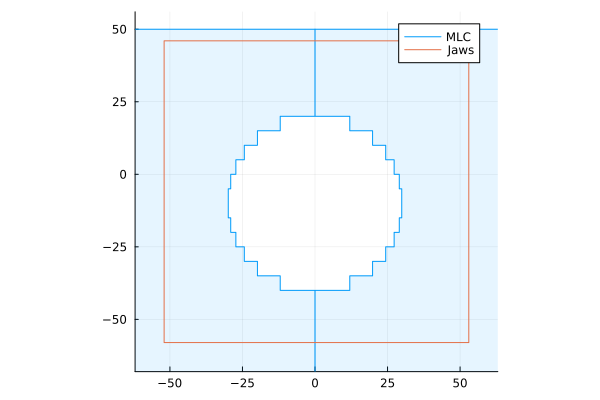

In [13]:
plot_bld(mlc2; label="MLC")
plot_bld!(jaws; label="Jaws")
axes_lims!(jaws)

It takes an optional `pad` arguments, which adds a pad so that the jaws are still visible, defaults to 10.